In [1]:
import git
import sys

repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
 
# setting path
sys.path.append(homedir)

%load_ext autoreload
%autoreload 2
from utils import *
import os
import numpy as np
import pandas as pd
import pickle
import traceback
from utils import videometa

homedir

'C:\\Users\\amanda\\Documents\\GitHub\\cs231n'

### Load and preprocess data

In [2]:
num_joints = 17

In [3]:
processed_npz_path="{}/pretrained_models/poseformer/1ovgasC1/input_2D/".format(homedir)
res = np.load("{}/keypoints.npz".format(processed_npz_path))['reconstruction']
res.shape

(1, 325, 17, 2)

In [4]:
res = np.reshape(res, (res.shape[1], res.shape[2], res.shape[3]))
print(res[0])

[[171.34386  256.31653 ]
 [158.9295   260.97192 ]
 [196.17256  307.52573 ]
 [177.55103  350.97598 ]
 [183.75821  251.66115 ]
 [236.5192   285.80063 ]
 [211.69049  329.25085 ]
 [161.77441  213.6422  ]
 [169.27478  163.72615 ]
 [176.38718  140.70789 ]
 [171.34386  111.999695]
 [186.86179  164.76068 ]
 [221.00127  186.48581 ]
 [196.17256  189.58939 ]
 [140.30797  177.17503 ]
 [177.55103  208.21092 ]
 [202.37973  183.38222 ]]


In [5]:
# reshape data into format (# frames, num_joints * 3) where for each joint, the 3 values are (x, y, conf) 
# we'll default to 1 for confidence since these values aren't needed to calculate joint positions
reshaped_res = np.ones((res.shape[0], num_joints * 3))
mask_x = [i for i in range(0, num_joints*3, 3)]
mask_y = [i+1 for i in range(0, num_joints*3, 3)]
reshaped_res[:,mask_x] = res[:,:,0]
reshaped_res[:,mask_y] = res[:,:,1]
reshaped_res

array([[171.34385681, 256.31652832,   1.        , ..., 202.37973022,
        183.38221741,   1.        ],
       [169.83135986, 256.83422852,   1.        , ..., 202.10549927,
        183.06477356,   1.        ],
       [170.2118988 , 256.5680542 ,   1.        , ..., 199.43978882,
        182.72915649,   1.        ],
       ...,
       [174.77770996, 269.71792603,   1.        , ..., 227.77799988,
        201.57470703,   1.        ],
       [174.68728638, 269.54486084,   1.        , ..., 227.22172546,
        202.00056458,   1.        ],
       [174.2666626 , 267.08917236,   1.        , ..., 220.52268982,
        201.43547058,   1.        ]])

### Get Metrics 

R
[ 80 147 209 271]
[ 44 113 179 242 301]
[ 11  80 147 209 271 324]
[ 44 113 179 242 301]


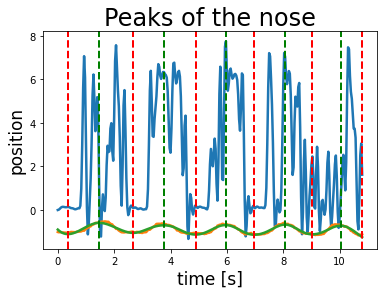

2.6990946874368147


IndexError: index 66 is out of bounds for axis 1 with size 60

In [6]:
process_subject_poseformer("1ovgasC1", reshaped_res, framerate=30)